In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import seaborn as sns

In [ ]:
# Making a list of missing value types
missing_values = ["-"]
df_bio = pd.read_csv("Bio_Base_Data.csv", na_values = missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_bio.head()

,RANDOM_ID,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,FIRST_DEGYR,SECOND_DEGREE,SECOND_DEGYR,FINAL_DEGREE,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,0YDDHEX2,NaN,NaN,0,F,NaN,10000.0,K - $10K-$24.9K,Friend,Not a Member,NaN,Married,Midwest States,MI,48640-7230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,12-Apr-17,12-Apr-90,17,25,0,0,0,0,0,0,1,0,0,0,2,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HCMY2X37,41.0,NaN,0,F,Gen X,10000.0,K - $10K-$24.9K,Parent,Short-term Member,NaN,Married,Texas MidRange Towns,TX,78404-1734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13-Jul-18,23-Feb-77,25,46,0,0,9,0,0,0,1,0,0,0,6,0,0,0,0,0,0,19,0,6,0,0,0,4,0,0,0,0,0,0,0
2,S49J7SLC,77.0,NaN,0,F,Boomer,NaN,z - Unknown,Friend,Not a Member,NaN,Married,Texas Small Towns,TX,75757-9374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13-Feb-17,1-Aug-86,4,4,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,KKXN2R59,82.0,NaN,0,M,Silent,50000.0,H - $50K-$99.9K,Alumni,Life Member,NaN,Married,Austin Tx,TX,78737-8535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,BS,1962,NaN,0,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,22-Oct-19,5-Mar-80,30,33,0,0,0,3,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3S9EALE1,85.0,NaN,0,M,Silent,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,Texas Small Towns,TX,77465-9209,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,BS,1958,NaN,0,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,20-Oct-19,16-Aug-12,6,9,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91631 entries, 0 to 91630
Columns: 120 entries, RANDOM_ID to GRP_PG_CNT
dtypes: float64(34), int64(68), object(18)
memory usage: 83.9+ MB


In [ ]:
df_bio.describe()

,AGE,PROFESSIONAL_SUFFIX_IND,HH_CAPACITY_RANGE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGYR,SECOND_DEGYR,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,NUMBER_EXT_DEGREE,STEM_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,CHILD_IS_ENROLLED,IS_SPOUSE_OF_ALUMI,SPOUSE_IS_ENROLLED,CURRENT_UT_EMPLOYEE,PAST_UT_EMPLOYEE,CURRENT_FACULTY,CURRENT_STAFF,GRP_NONMON_GIFTS,GRP_PG_PROD,GRP_PROD,GRP_PROD_AF,...,GRP_PROD_NS,GRP_PROD_NU,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
count,71136.000000,91631.000000,4.484900e+04,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,...,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000
mean,52.057144,0.084753,5.446509e+04,0.167771,0.020583,0.009069,0.008087,0.044614,0.078074,0.081392,0.010979,0.071024,0.031812,0.013456,0.013969,0.132848,0.015028,0.010924,0.433620,0.282754,1269.360173,240.548330,23.555129,0.769434,0.070064,0.065971,0.189128,0.636488,0.115158,0.041296,0.193744,0.000120,0.075739,0.189292,0.038000,0.061300,0.027272,4.543710,2034.335711,6.551640,...,160.313983,17.632096,38.237526,13.846934,153.849453,2.024816,42.388781,7.366972,14.155613,0.035010,0.103939,0.252546,0.431546,0.278159,0.015486,0.254892,0.055091,0.242352,0.837664,1.703768,0.081032,1.116162,0.006450,0.057732,0.000567,0.028626,0.092960,0.249239,0.795801,0.034639,0.083913,0.882867,0.800166,0.142725,0.181925,0.100108,4.212897,0.003590,0.300521,0.001048
std,17.325438,0.278515,7.157145e+05,0.373665,0.141983,0.094799,0.089563,0.206455,0.268289,0.273437,0.104204,0.256866,0.175501,0.115218,0.117363,0.339412,0.121663,0.103947,0.495577,0.450340,959.391588,649.983794,215.693184,0.685452,0.255256,0.318072,0.391613,0.481013,0.319214,0.198975,0.395233,0.010956,0.264581,0.391742,0.191198,0.239881,0.162877,231.514897,3905.714331,154.535205,...,1004.948527,317.158806,506.186057,272.534749,799.592744,112.383106,296.066581,7.987831,23.722997,0.337054,1.209326,1.600068,2.215948,1.578629,0.305949,1.095409,0.375006,1.847637,3.659951,4.833417,1.126658,3.643687,0.109825,0.697610,0.047181,0.378223,1.268367,1.458913,3.167309,0.504114,0.968182,3.888739,3.407889,1.600568,1.838537,1.119766,17.834504,0.094934,0.990039,0.033673
min,0.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,

In [ ]:
# Check the total number of observations in the dataset
print('Total number of observations in the dataset are:',df_bio.shape[0])

Total number of observations in the dataset are: 91631


In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_bio.columns:
    nullcount = df_bio[col].isnull().sum()
    pct_missing = np.mean(df_bio[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
PROFESSIONAL_SUFFIX 83865 - 92%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%
SECOND_DEGREE 80592 - 88%
FINAL_DEGREE 90551 - 99%


In [ ]:
df_amnt = pd.read_csv("Gift_total_by_CSU_Since_FY2015.csv")

In [ ]:
df_amnt.head()

,RANDOM_ID,CSU_CODE,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
0,THTKM076,CF,2020,5294631,50.0
1,THTKM076,DM,2016,205965,25.0
2,THTKM076,NS,2019,4808641,25.0
3,THTKM076,NS,2018,4447701,50.0
4,THTKM076,NS,2017,264264,25.0


In [ ]:
# Check the total number of observations in the dataset
print('Total number of observations in the dataset are:', df_amnt.shape[0])

Total number of observations in the dataset are: 258148


In [ ]:
giving_year_count = df_amnt.groupby(['RANDOM_ID','FISCAL_YEAR_ENDING'])['TOTAL_AMT_2015_2020'].sum()

In [ ]:
user_yearly_data =  giving_year_count.to_frame().reset_index()
print(user_yearly_data)

       RANDOM_ID  FISCAL_YEAR_ENDING  TOTAL_AMT_2015_2020
0       00017EH9                2015                15.00
1       000V0H91                2015               250.00
2       001J3BUD                2015               500.00
3       001J3BUD                2018                25.00
4       001J3BUD                2020               294.23
...          ...                 ...                  ...
204253  ZZZC54VI                2015              1499.94
204254  ZZZC54VI                2017              4999.80
204255  ZZZPEPYG                2018               100.00
204256  ZZZPEPYG                2019               100.00
204257  ZZZPEPYG                2020               250.00

[204258 rows x 3 columns]


In [ ]:
user_yearly_data_df = user_yearly_data.groupby(['RANDOM_ID']).nunique()
user_yearly_data_df

,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
RANDOM_ID,,
00017EH9,1,1
000V0H91,1,1
001J3BUD,3,3
001RB8B4,1,1
001TY1IF,5,3
...,...,...
ZZYT6KZ6,3,1
ZZZ7S81M,1,1
ZZZBT9C0,1,1


In [ ]:
user_yearly_data_df = user_yearly_data_df.drop(columns=['TOTAL_AMT_2015_2020'])
user_yearly_data_df = user_yearly_data_df.rename(columns={'index': 'RANDOM_ID','FISCAL_YEAR_ENDING':'Giving_Year_Count'}).reset_index()

In [ ]:
user_yearly_data_df

,RANDOM_ID,Giving_Year_Count
0,00017EH9,1
1,000V0H91,1
2,001J3BUD,3
3,001RB8B4,1
4,001TY1IF,5
...,...,...
98363,ZZYT6KZ6,3
98364,ZZZ7S81M,1
98365,ZZZBT9C0,1
98366,ZZZC54VI,2


In [ ]:
dum_df = pd.get_dummies(df_amnt, columns=["FISCAL_YEAR_ENDING"], prefix=["Donation_Year_"])
dum_df

,RANDOM_ID,CSU_CODE,DONOR_INTENT_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,CF,5294631,50.00,0,0,0,0,0,1
1,THTKM076,DM,205965,25.00,0,1,0,0,0,0
2,THTKM076,NS,4808641,25.00,0,0,0,0,1,0
3,THTKM076,NS,4447701,50.00,0,0,0,1,0,0
4,THTKM076,NS,264264,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,GR,3224609,100.00,1,0,0,0,0,0
258144,F3JAEMON,LA,3492004,40.00,1,0,0,0,0,0
258145,NQVCEOG8,NS,72452,100.00,1,0,0,0,0,0
258146,KL31U0S6,ED,83353,20.15,1,0,0,0,0,0


In [ ]:
## data pre processing
## Drop CSU_CODE and DONOR_INTENT_ID
dum_df = dum_df .drop(columns=['CSU_CODE','DONOR_INTENT_ID'])
dum_df

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,50.00,0,0,0,0,0,1
1,THTKM076,25.00,0,1,0,0,0,0
2,THTKM076,25.00,0,0,0,0,1,0
3,THTKM076,50.00,0,0,0,1,0,0
4,THTKM076,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,100.00,1,0,0,0,0,0
258144,F3JAEMON,40.00,1,0,0,0,0,0
258145,NQVCEOG8,100.00,1,0,0,0,0,0
258146,KL31U0S6,20.15,1,0,0,0,0,0


In [ ]:
giving_pattern_df = dum_df.groupby(by='RANDOM_ID').agg({'TOTAL_AMT_2015_2020': 'sum',
                              'Donation_Year__2015': 'sum',
                              'Donation_Year__2016': 'sum',
                              'Donation_Year__2017': 'sum',
                              'Donation_Year__2018': 'sum',
                              'Donation_Year__2019':'sum',
                              'Donation_Year__2020':'sum'}).reset_index()

In [ ]:
#user_yearly_data_df 
df_merge = pd.merge(left=giving_pattern_df, right=user_yearly_data_df, left_on='RANDOM_ID', right_on='RANDOM_ID',how='left')
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count
0,00017EH9,15.00,1,0,0,0,0,0,1
1,000V0H91,250.00,1,0,0,0,0,0,1
2,001J3BUD,819.23,1,0,0,1,0,2,3
3,001RB8B4,485.14,0,0,0,0,2,0,1
4,001TY1IF,1050.00,1,1,1,1,0,3,5
...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2


In [ ]:
def number_of_years_skipped(Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020):

  if ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016>0 and Donation_Year__2018 >0 and Donation_Year__2020 >0)):
    return 0
  elif ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2016>0 and Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1
  
  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1

  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  
  ### skips two year

  elif ((Donation_Year__2015>0 and Donation_Year__2018>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 == 0 and Donation_Year__2020 ==0)):
    return 2

  elif ((Donation_Year__2016>0 and Donation_Year__2019>0) and (Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2015 == 0 and Donation_Year__2020 ==0)):
    return 2
  
  elif ((Donation_Year__2017>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 2

    ### skips three year

  elif ((Donation_Year__2015>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 3

  elif ((Donation_Year__2016>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 3

    ### skips four year

  elif ((Donation_Year__2015>0 and Donation_Year__2020>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 4

  else:
    return 5



In [ ]:
df_merge['Skip_Years'] = df_merge.apply(lambda x: number_of_years_skipped(x['Donation_Year__2015'],x['Donation_Year__2016'],x['Donation_Year__2017'],x['Donation_Year__2018'],
                           x['Donation_Year__2019'],x['Donation_Year__2020']),axis=1)

In [ ]:
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count,Skip_Years
0,00017EH9,15.00,1,0,0,0,0,0,1,5
1,000V0H91,250.00,1,0,0,0,0,0,1,5
2,001J3BUD,819.23,1,0,0,1,0,2,3,5
3,001RB8B4,485.14,0,0,0,0,2,0,1,5
4,001TY1IF,1050.00,1,1,1,1,0,3,5,5
...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3,5
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,5
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,5
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2,5


In [ ]:
df_total_amnt = df_merge.drop(columns=['Donation_Year__2015','Donation_Year__2016','Donation_Year__2017','Donation_Year__2018','Donation_Year__2019','Donation_Year__2020'])

In [ ]:
df_total_amnt

,RANDOM_ID,TOTAL_AMT_2015_2020,Giving_Year_Count,Skip_Years
0,00017EH9,15.00,1,5
1,000V0H91,250.00,1,5
2,001J3BUD,819.23,3,5
3,001RB8B4,485.14,1,5
4,001TY1IF,1050.00,5,5
...,...,...,...,...
98363,ZZYT6KZ6,150.00,3,5
98364,ZZZ7S81M,500.00,1,5
98365,ZZZBT9C0,35.00,1,5
98366,ZZZC54VI,6499.74,2,5


In [ ]:
df_data = pd.merge(left = df_total_amnt, right = df_bio, left_on = "RANDOM_ID", right_on = "RANDOM_ID", how ='left')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98368 entries, 0 to 98367
Columns: 123 entries, RANDOM_ID to GRP_PG_CNT
dtypes: float64(103), int64(2), object(18)
memory usage: 93.1+ MB


In [ ]:
df_data.describe()

,TOTAL_AMT_2015_2020,Giving_Year_Count,Skip_Years,AGE,PROFESSIONAL_SUFFIX_IND,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGYR,SECOND_DEGYR,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,NUMBER_EXT_DEGREE,STEM_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,CHILD_IS_ENROLLED,IS_SPOUSE_OF_ALUMI,SPOUSE_IS_ENROLLED,CURRENT_UT_EMPLOYEE,PAST_UT_EMPLOYEE,CURRENT_FACULTY,CURRENT_STAFF,GRP_NONMON_GIFTS,GRP_PG_PROD,...,GRP_PROD_NS,GRP_PROD_NU,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
count,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,...,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000
mean,624.161151,1.988508,4.622813,52.057144,0.084753,0.167771,0.020583,0.009069,0.008087,0.044614,0.078074,0.081392,0.010979,0.071024,0.031812,0.013456,0.013969,0.132848,0.015028,0.010924,0.433620,0.282754,1269.360173,240.548330,23.555129,0.769434,0.070064,0.065971,0.189128,0.636488,0.115158,0.041296,0.193744,0.000120,0.075739,0.189292,0.038000,0.061300,0.027272,4.543710,...,160.313983,17.632096,38.237526,13.846934,153.849453,2.024816,42.388781,7.366972,14.155613,0.035010,0.103939,0.252546,0.431546,0.278159,0.015486,0.254892,0.055091,0.242352,0.837664,1.703768,0.081032,1.116162,0.006450,0.057732,0.000567,0.028626,0.092960,0.249239,0.795801,0.034639,0.083913,0.882867,0.800166,0.142725,0.181925,0.100108,4.212897,0.003590,0.300521,0.001048
std,1675.678683,1.466706,1.225977,15.265360,0.278515,0.373665,0.141983,0.094799,0.089563,0.206455,0.268289,0.273437,0.104204,0.256866,0.175501,0.115218,0.117363,0.339412,0.121663,0.103947,0.495577,0.450340,959.391588,649.983794,215.693184,0.685452,0.255256,0.318072,0.391613,0.481013,0.319214,0.198975,0.395233,0.010956,0.264581,0.391742,0.191198,0.239881,0.162877,231.514897,...,1004.948527,317.158806,506.186057,272.534749,799.592744,112.383106,296.066581,7.987831,23.722997,0.337054,1.209326,1.600068,2.215948,1.578629,0.305949,1.095409,0.375006,1.847637,3.659951,4.833417,1.126658,3.643687,0.109825,0.697610,0.047181,0.378223,1.268367,1.458913,3.167309,0.504114,0.968182,3.888739,3.407889,1.600568,1.838537,1.119766,17.834504,0.094934,0.990039,0.033673
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000

In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 27232 - 28%
PROFESSIONAL_SUFFIX 90602 - 92%
PROFESSIONAL_SUFFIX_IND 6737 - 7%
GENDER 7210 - 7%
GENERATION 27232 - 28%
HH_CAPACITY_RANGE 53519 - 54%
CAMPAIGN_ROLLUP_CAPACITY 6737 - 7%
LINK_TO_UT 6737 - 7%
EX_MEMBER 7056 - 7%
ETHNICITY 48278 - 49%
MARITAL_STATUS 9042 - 9%
MSA 6737 - 7%
PREF_STATE 8171 - 8%
PREF_ZIPCODE 7244 - 7%
DEGREE_GR 6737 - 7%
DEGREE_CF 6737 - 7%
DEGREE_GL 6737 - 7%
DEGREE_JS 6737 - 7%
DEGREE_CO 6737 - 7%
DEGREE_EN 6737 - 7%
DEGREE_LO 6737 - 7%
DEGREE_AT 6737 - 7%
DEGREE_NS 6737 - 7%
DEGREE_ED 6737 - 7%
DEGREE_LJ 6737 - 7%
DEGREE_NU 6737 - 7%
DEGREE_LA 6737 - 7%
DEGREE_PH 6737 - 7%
DEGREE_SW 6737 - 7%
UNDERGRAD_IND 6737 - 7%
POSTGRAD_IND 6737 - 7%
FIRST_DEGREE 40046 - 41%
FIRST_DEGYR 6737 - 7%
SECOND_DEGREE 87329 - 89%
SECOND_DEGYR 6737 - 7%
FINAL_DEGREE 97288 - 99%
FINAL_DEGYR 6737 - 7%
NUM_DEGREES 6737 - 7%
MULTI_DEGREE_CSUS_IND 6737 - 7%
UT_LAST_DEGREE_MAJOR_TITLE 6737 - 7%
NUMBER_EXT_DEGREE 6737 - 7%
STEM_DEGREE 6737 - 7%
IS_ALUMNI 6737 - 7%
IS_PARENT_OF_ALU

In [ ]:
df_data.dropna(thresh=90,inplace=True)

In [ ]:
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Giving_Year_Count,Skip_Years,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,FIRST_DEGYR,SECOND_DEGREE,SECOND_DEGYR,FINAL_DEGREE,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,5,33.0,Ph.D.,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MS,2014.0,PHD,2014.0,NaN,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,5,NaN,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,3,5,35.0,NaN,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MBA,2014.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,1,5,NaN,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,5,5,69.0,NaN,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,3,5,96.0,NaN,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,BA,1947.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,1,5,48.0,NaN,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
PROFESSIONAL_SUFFIX 83865 - 92%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%
SECOND_DEGREE 80592 - 88%
FINAL_DEGREE 90551 - 99%


In [ ]:
## data pre processing

df_data = df_data .drop(columns=['PROFESSIONAL_SUFFIX','SECOND_DEGREE','FINAL_DEGREE'])
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Giving_Year_Count,Skip_Years,AGE,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,FIRST_DEGYR,SECOND_DEGYR,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,5,33.0,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MS,2014.0,2014.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,5,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,3,5,35.0,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MBA,2014.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,1,5,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,5,5,69.0,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,3,5,96.0,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,BA,1947.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,1,5,48.0,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Handling Missing Data

In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%


In [ ]:
df_data["Skip_Years"].value_counts()

5    83025
0     4216
1     1841
2     1323
3      923
4      303
Name: Skip_Years, dtype: int64

## Explore data with 0 or 1 skip years


In [ ]:

#To select rows whose column value equals a scalar, some_value, use ==:
df_skip_0 = df_data.loc[df_data['Skip_Years'] == 0]

In [ ]:
df_skip_0

,RANDOM_ID,TOTAL_AMT_2015_2020,Giving_Year_Count,Skip_Years,AGE,PROFESSIONAL_SUFFIX_IND,GENDER,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,MARITAL_STATUS,MSA,PREF_STATE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGYR,SECOND_DEGYR,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,UT_LAST_DEGREE_MAJOR_TITLE,NUMBER_EXT_DEGREE,STEM_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
48,00RWUCNF,1712.0,6,0,52.057144,0.0,F,J - $25K-$49.9K,Friend,Not a Member,Married,Austin Tx,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-Aug-20,22-May-14,7.0,24.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,01B6LN3Y,1650.0,6,0,63.000000,0.0,F,H - $50K-$99.9K,Alumni,Life Member,Divorced,Austin Tx,TX,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1976.0,1985.0,0.0,2.0,1.0,Business Administration,0.0,0.0,1.0,0.0,...,0.0,0.0,3792.0,0.0,0.0,20-Aug-20,1-Mar-85,33.0,113.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,0.0
105,01CAZXBM,700.0,6,0,55.000000,0.0,M,J - $25K-$49.9K,Alumni,Life Member,Married,Austin Tx,TX,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1987.0,1990.0,0.0,2.0,1.0,Law - Jurisprudence,0.0,0.0,1.0,0.0,...,0.0,0.0,100.0,0.0,0.0,11-Aug-20,16-Jan-91,26.0,115.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
111,01F2I1OX,600.0,6,0,67.000000,0.0,M,K - $10K-$24.9K,Alumni,Not a Member,Unknown,Texas Metropolitan,TX,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1976.0,0.0,0.0,1.0,0.0,Accounting,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12-Oct-19,21-Apr-95,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,024CFRY3,555.0,6,0,80.000000,0.0,F,z - Unknown,Alumni,Not a Member,Married,Austin Tx,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1980.0,0.0,0.0,1.0,0.0,Textiles and Clothing/Apparel,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27-Mar-20,30-Oct-86,18.0,35.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98209,ZXZBFSVH,1712.0,6,0,55.000000,0.0,F,K - $10K-$24.9K,Friend,Not a Member,Married,Austin Tx,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-Aug-20,15-Apr-13,8.0,13.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98215,ZY34RRVL,5850.0,6,0,76.000000,0.0,F,H - $50K-$99.9K,Alumni,Life Member,Divorced,Texas Metropolitan,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1966.0,0.0,0.0,1.0,0.0,Elementary Education,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29-Oct-19,17-Jan-02,11.0,18.0,0.0,0.0,0.0,0

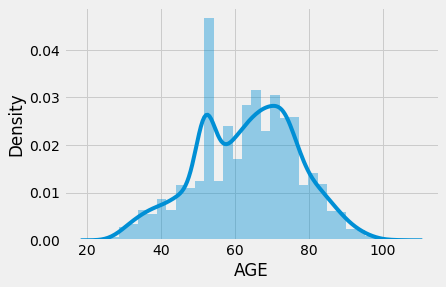

In [ ]:
#histogram
sns.distplot(df_skip_0['AGE']);

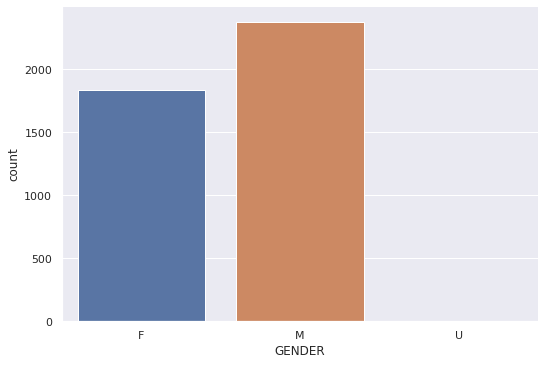

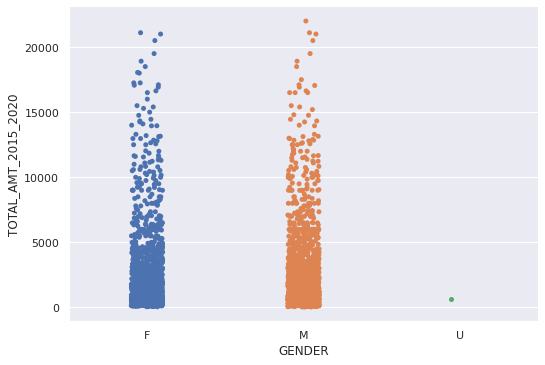

In [ ]:
sns.catplot("GENDER", data=df_skip_0, aspect=1.5, kind="count")
sns.catplot(x="GENDER", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0) 

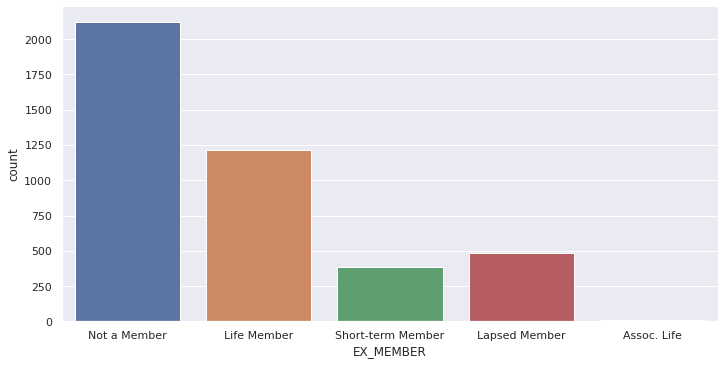

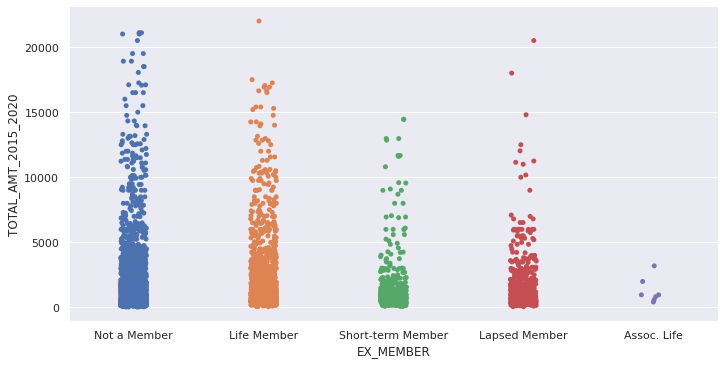

In [ ]:
sns.catplot("EX_MEMBER", data=df_skip_0, aspect=2, kind="count")
sns.catplot(x="EX_MEMBER", y="TOTAL_AMT_2015_2020",aspect=2, data=df_skip_0)


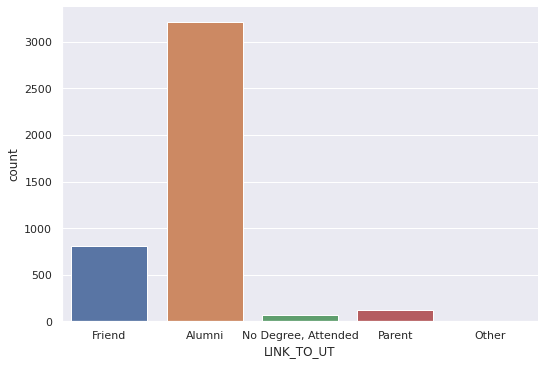

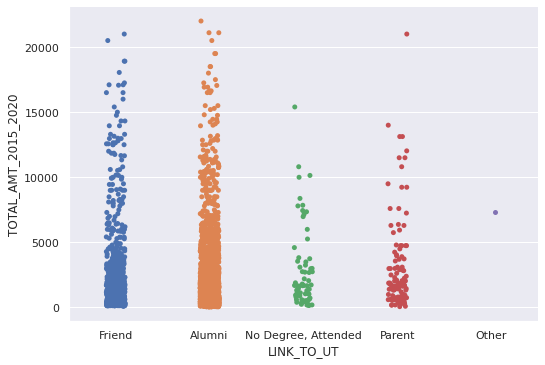

In [ ]:

sns.catplot("LINK_TO_UT", data=df_skip_0, aspect=1.5, kind="count",ax=ax[0])

FIRST_DEGREE
sns.catplot(x="LINK_TO_UT", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0, ax=ax[1])


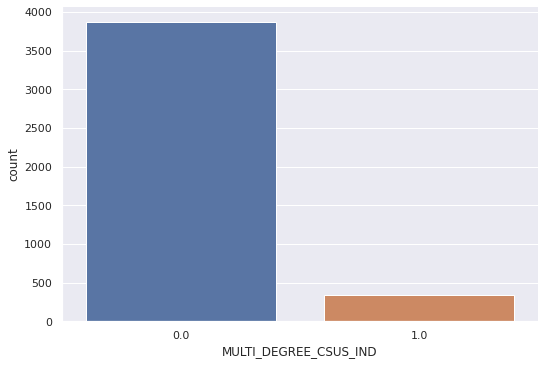

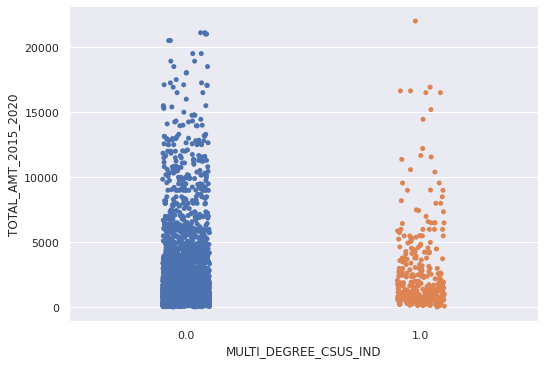

In [ ]:

sns.catplot(x="MULTI_DEGREE_CSUS_IND", data=df_skip_0, aspect=1.5, kind="count")

sns.catplot(x="MULTI_DEGREE_CSUS_IND", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0)



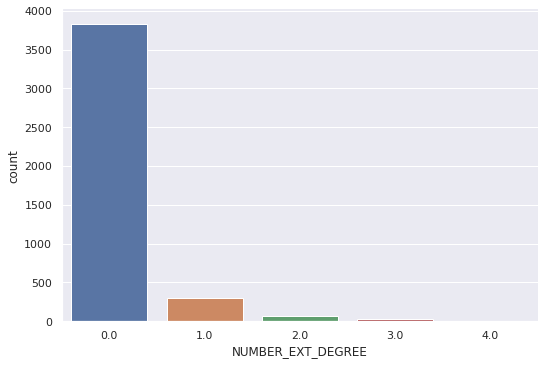

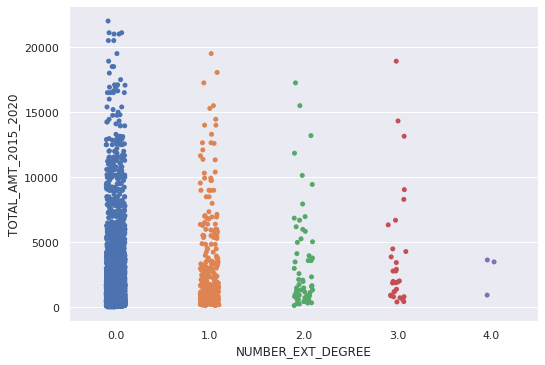

In [ ]:

sns.catplot(x="NUMBER_EXT_DEGREE", data=df_skip_0, aspect=1.5, kind="count")

sns.catplot(x="NUMBER_EXT_DEGREE", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0)



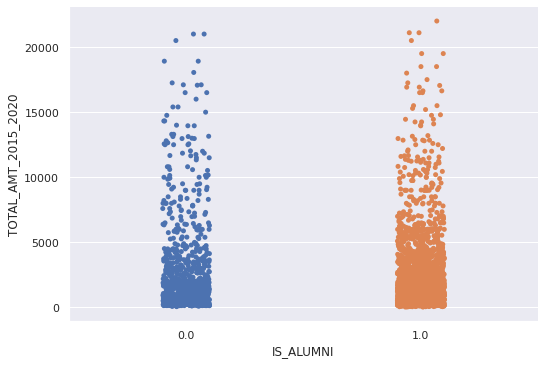

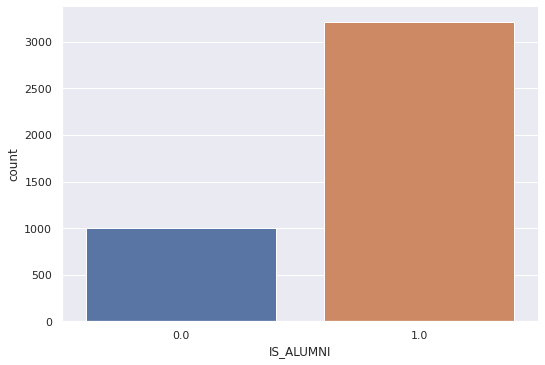

In [ ]:
sns.catplot(x="IS_ALUMNI", y="TOTAL_AMT_2015_2020",aspect=1.5,data=df_skip_0)
sns.catplot(x="IS_ALUMNI", data=df_skip_0, aspect=1.5, kind="count",ax=ax[0])


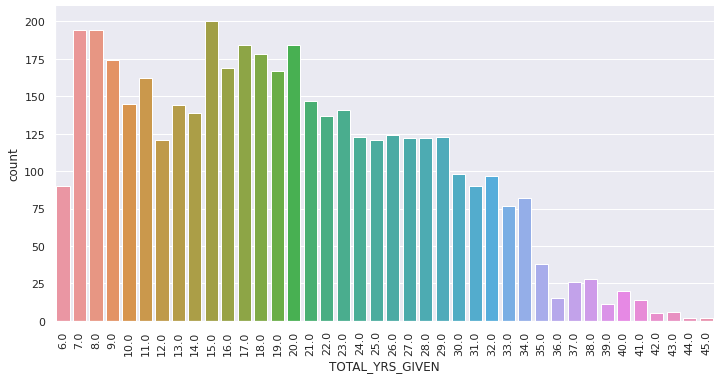

In [ ]:
#TOTAL_YRS_GIVEN
plt_yrs = sns.catplot(x="TOTAL_YRS_GIVEN", data=df_skip_0, aspect=2, kind="count",ax=ax[0])
plt_yrs.set_xticklabels(rotation=90)

In [ ]:
sns.catplot(x="STEM_DEGREE", y="TOTAL_AMT_2015_2020",aspect=1.5,data=df_skip_0)
sns.catplot(x="STEM_DEGREE", data=df_skip_0, aspect=1.5, kind="count",ax=ax[0])


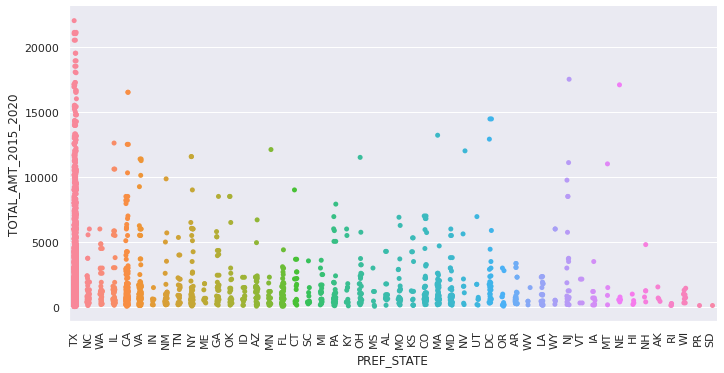

In [ ]:
plt_state = sns.catplot(x="PREF_STATE", y="TOTAL_AMT_2015_2020",aspect=2, data=df_skip_0)
plt_state.set_xticklabels(rotation=90)

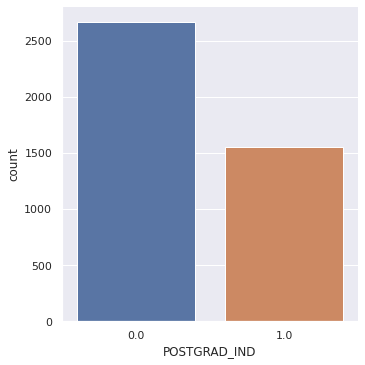

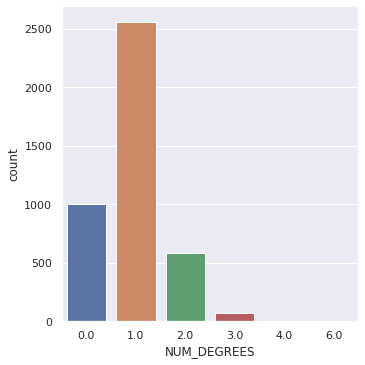

In [ ]:
sns.catplot(x="POSTGRAD_IND",kind="count",aspect=1, data=df_skip_0, ax=ax[1])
# POSTGRAD_IND
# UNDERGRAD_IND
sns.catplot(x="NUM_DEGREES",kind="count",aspect=1, data=df_skip_0, ax=ax[1])

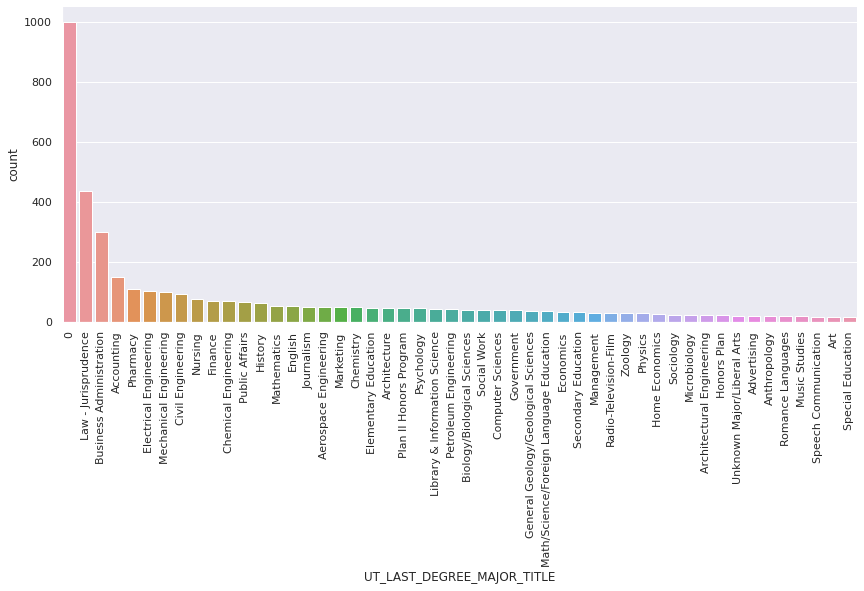

In [ ]:
# UT_LAST_DEGREE_MAJOR_TITLE

plt_degree = sns.catplot(x="UT_LAST_DEGREE_MAJOR_TITLE",kind="count", aspect=25/10, data=df_skip_0, 
                         order=df_skip_0['UT_LAST_DEGREE_MAJOR_TITLE'].value_counts().iloc[:50].index)
plt_degree.set_xticklabels(rotation=90)

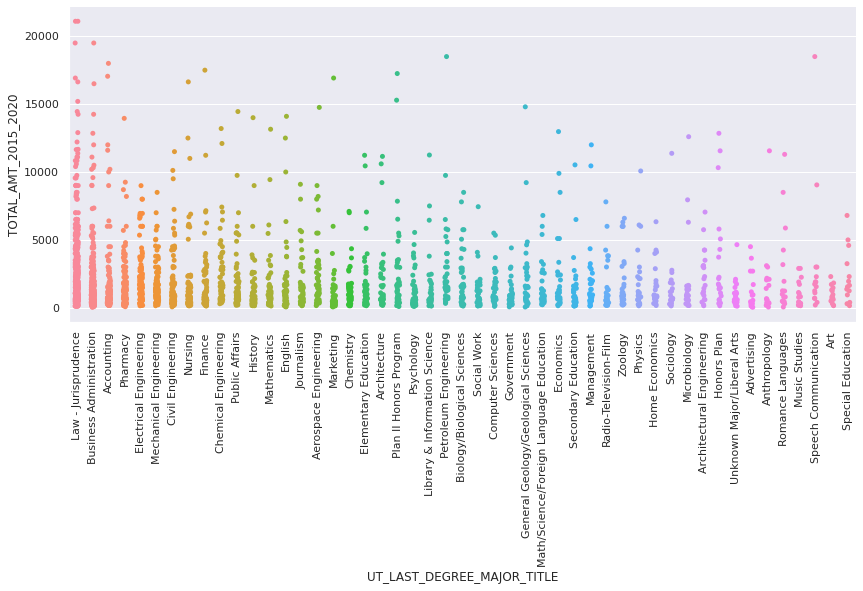

In [ ]:
# UT_LAST_DEGREE_MAJOR_TITLE

plt_degree = sns.catplot(x="UT_LAST_DEGREE_MAJOR_TITLE", y="TOTAL_AMT_2015_2020",aspect=25/10, data=df_skip_0,
                         order=df_skip_0['UT_LAST_DEGREE_MAJOR_TITLE'].value_counts().iloc[1:50].index)
plt_degree.set_xticklabels(rotation=90)

In [ ]:
df_skip_0['UT_LAST_DEGREE_MAJOR_TITLE'].value_counts()

0                                           1000
Law - Jurisprudence                          437
Business Administration                      300
Accounting                                   149
Pharmacy                                     107
                                            ... 
Architectural Studies (CoLA)                   1
Ecology, Evolution and Conservation Biol       1
Scandinavian                                   1
Design                                         1
Middle Eastern Studies                         1
Name: UT_LAST_DEGREE_MAJOR_TITLE, Length: 150, dtype: int64

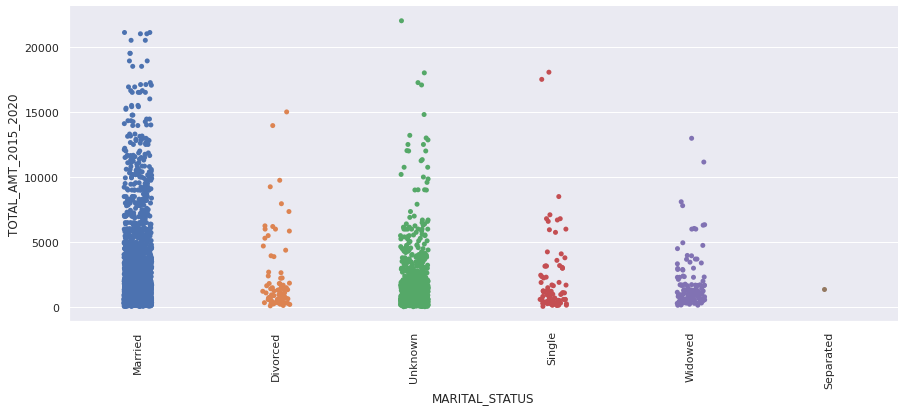

In [ ]:
 plt_m = sns.catplot(x="MARITAL_STATUS", y="TOTAL_AMT_2015_2020", data=df_skip_0,  aspect=25/10)
 plt_m.set_xticklabels(rotation=90)

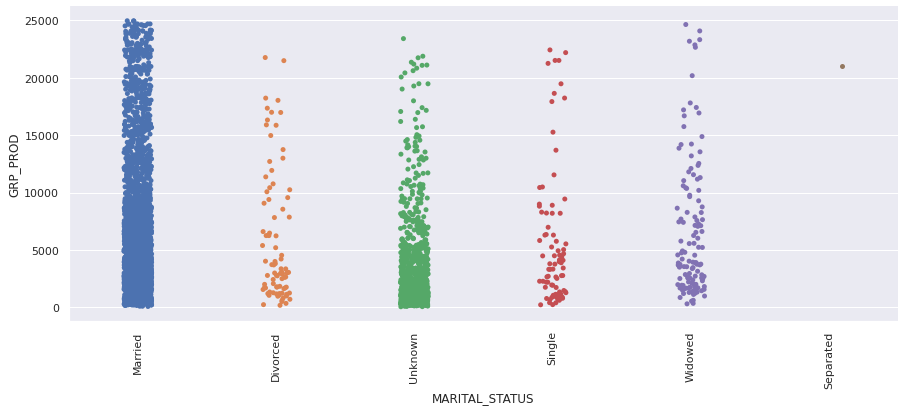

In [ ]:
 plt_m = sns.catplot(x="MARITAL_STATUS", y="GRP_PROD", data=df_skip_0,  aspect=25/10)
 plt_m.set_xticklabels(rotation=90)

In [ ]:
df_data["CAMPAIGN_ROLLUP_CAPACITY"].value_counts()

z - Unknown          39788
K - $10K-$24.9K      16579
J - $25K-$49.9K      13570
H - $50K-$99.9K       6714
S - $0                6395
G - $100K-$999.9K     6151
I - $25K-$99.9K       1775
N - $2.5K-$9.9K        247
F - $1M-$4.9M          187
L - < $10K             133
P - < $2.5k             36
E - $5M-$9.9M           25
D - $10M-$24.9M         18
C - $25M-$49.9M          7
A - >$100M+              3
B - > $50M+              3
Name: CAMPAIGN_ROLLUP_CAPACITY, dtype: int64

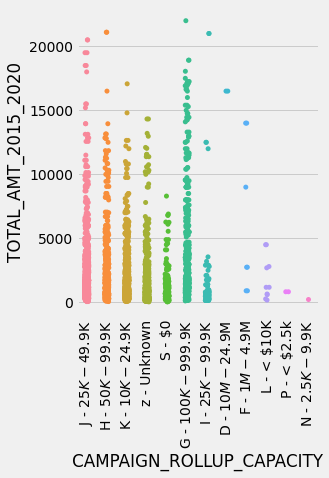

In [ ]:
g = sns.catplot(x="CAMPAIGN_ROLLUP_CAPACITY", y="TOTAL_AMT_2015_2020", data=df_skip_0, jitter=0.1)
g.set_xticklabels(rotation=90)

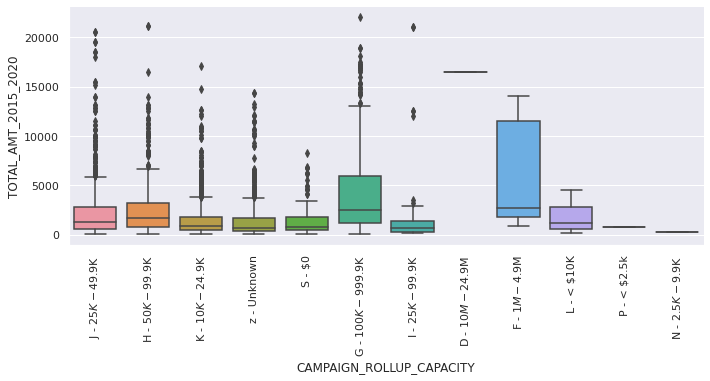

In [ ]:

g = sns.catplot(x='CAMPAIGN_ROLLUP_CAPACITY', y='TOTAL_AMT_2015_2020', data = df_skip_0,height=4,
             aspect=25/10 ,kind='box')
g.set_xticklabels(rotation=90)

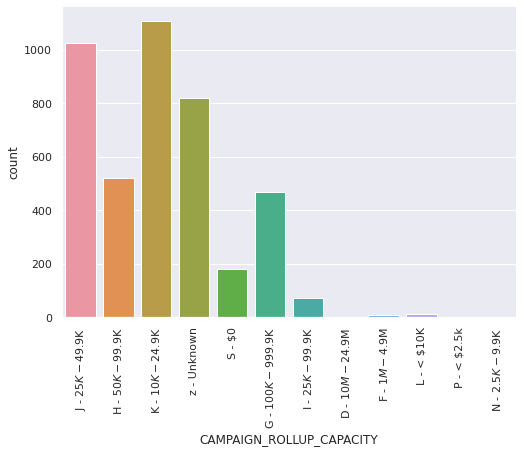

In [ ]:
g = sns.catplot("CAMPAIGN_ROLLUP_CAPACITY", data=df_skip_0, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

ValueError: ignored

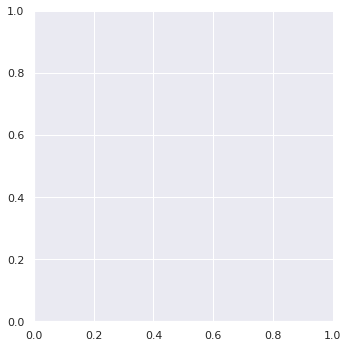

In [ ]:
# sns.catplot(x="TOTAL_AMT_2015_2020", y="CAMPAIGN_ROLLUP_CAPACITY", hue="GENDER", kind="swarm", data=df_skip_0)



In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_skip_0['AGE'].skew())
print("Kurtosis: %f" % df_skip_0['AGE'].kurt())

Skewness: -0.166489
Kurtosis: -0.417703


In [ ]:
df_data['AGE'].fillna(df_data['AGE'].mean(),inplace = True)
print(df_data.isnull().sum())

RANDOM_ID              0
TOTAL_AMT_2015_2020    0
Giving_Year_Count      0
Skip_Years             0
AGE                    0
                      ..
GRP_CNT_SW             0
GRP_CNT_TS             0
GRP_CNT_UG             0
GRP_CNT_VS             0
GRP_PG_CNT             0
Length: 120, dtype: int64


In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%


In [ ]:
df_data['GENDER'].fillna(df_data['GENDER'].mode()[0], inplace = True)

In [ ]:
df_data['MARITAL_STATUS'].fillna(df_data['MARITAL_STATUS'].mode()[0], inplace = True)

In [ ]:
df_data['PREF_STATE'].fillna(df_data['PREF_STATE'].mode()[0], inplace = True)

In [ ]:
df_data['EX_MEMBER'].fillna(df_data['EX_MEMBER'].mode()[0], inplace = True)

In [ ]:
df_data.drop(columns=['GENERATION','HH_CAPACITY_RANGE','PREF_ZIPCODE','FIRST_DEGREE'],inplace= True)

In [ ]:
df_data.drop(columns='ETHNICITY',inplace=True)

In [ ]:
df_data.shape

(91631, 115)

In [ ]:
selected_feature_df = df_data[['TOTAL_AMT_2015_2020','AGE','GENDER','LINK_TO_UT','EX_MEMBER','MARITAL_STATUS',
                       'MSA','DEGREE_GR','DEGREE_CF','DEGREE_GL','DEGREE_JS','DEGREE_CO','DEGREE_EN','DEGREE_LO','DEGREE_AT','DEGREE_NS',
                       'DEGREE_ED','DEGREE_LJ','DEGREE_NU','DEGREE_LA','DEGREE_PH','DEGREE_SW','TOTAL_YRS_GIVEN','GIFT_CNT',
                       'UNDERGRAD_IND', 'POSTGRAD_IND','MULTI_DEGREE_CSUS_IND','NUMBER_EXT_DEGREE','STEM_DEGREE','IS_ALUMNI','IS_PARENT_OF_ALUMNI',
                       'CHILD_IS_ENROLLED','IS_SPOUSE_OF_ALUMI','SPOUSE_IS_ENROLLED','CURRENT_UT_EMPLOYEE','PAST_UT_EMPLOYEE','CURRENT_FACULTY','CURRENT_STAFF',
                       'GRP_NONMON_GIFTS','GRP_PROD','LAST_GIVING_DATE','FIRST_GIVING_DATE','TOTAL_YRS_GIVEN','GIFT_CNT']]

In [ ]:
new_df = selected_feature_df.copy()

In [ ]:
new_df.shape

(91631, 44)

In [ ]:
new_df.describe()

,TOTAL_AMT_2015_2020,AGE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,TOTAL_YRS_GIVEN,GIFT_CNT,UNDERGRAD_IND,POSTGRAD_IND,MULTI_DEGREE_CSUS_IND,NUMBER_EXT_DEGREE,STEM_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,CHILD_IS_ENROLLED,IS_SPOUSE_OF_ALUMI,SPOUSE_IS_ENROLLED,CURRENT_UT_EMPLOYEE,PAST_UT_EMPLOYEE,CURRENT_FACULTY,CURRENT_STAFF,GRP_NONMON_GIFTS,GRP_PROD,TOTAL_YRS_GIVEN,GIFT_CNT
count,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000
mean,624.161151,52.057144,0.167771,0.020583,0.009069,0.008087,0.044614,0.078074,0.081392,0.010979,0.071024,0.031812,0.013456,0.013969,0.132848,0.015028,0.010924,7.366972,14.155613,0.433620,0.282754,0.070064,0.065971,0.189128,0.636488,0.115158,0.041296,0.193744,0.000120,0.075739,0.189292,0.038000,0.061300,0.027272,2034.335711,7.366972,14.155613
std,1675.678683,15.265360,0.373665,0.141983,0.094799,0.089563,0.206455,0.268289,0.273437,0.104204,0.256866,0.175501,0.115218,0.117363,0.339412,0.121663,0.103947,7.987831,23.722997,0.495577,0.450340,0.255256,0.318072,0.391613,0.481013,0.319214,0.198975,0.395233,0.010956,0.264581,0.391742,0.191198,0.239881,0.162877,3905.714331,7.987831,23.722997
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000
25%,50.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,2.000000
50%,122.000000,52.057144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,4.000000,5.000000
75%,475.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1901.000000,11.000000,16.000000
max,25000.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,322.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25000.000000,45.000000,322.000000


In [ ]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

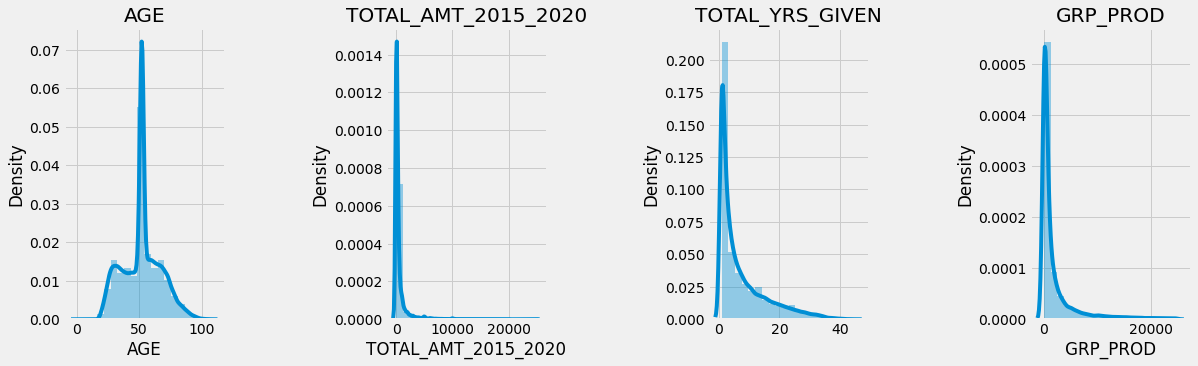

In [ ]:
plt.figure(1 , figsize = (18 , 5))
n = 0 
for x in ['AGE' , 'TOTAL_AMT_2015_2020' , 'TOTAL_YRS_GIVEN','GRP_PROD']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 1)
    sns.distplot(new_df[x] , bins = 20)
    plt.title('{}'.format(x))
plt.show()

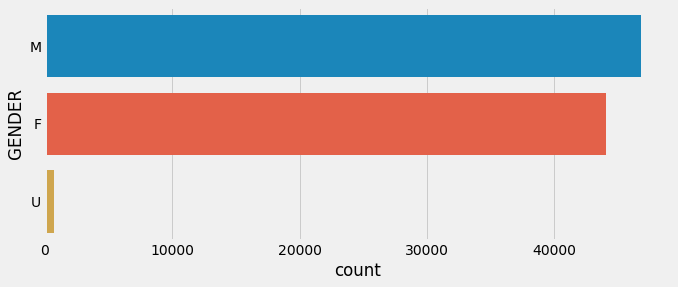

In [ ]:
plt.figure(1 , figsize = (10 , 4))
sns.countplot(y = 'GENDER' , data = new_df)
plt.show()

In [ ]:
# Inspect the categorical variables

new_df.select_dtypes('object').nunique()

new_df.drop(columns=["LAST_GIVING_DATE","FIRST_GIVING_DATE"],inplace=True)

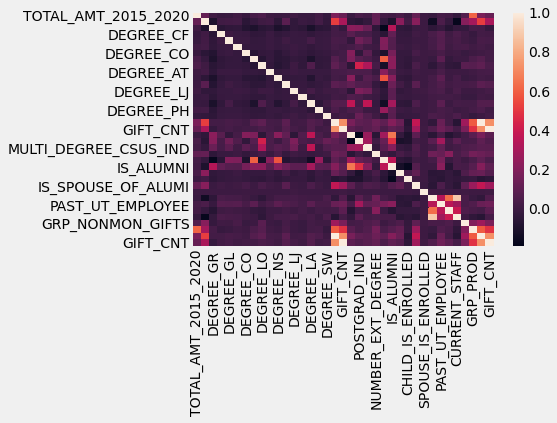

In [ ]:
sns.heatmap(new_df.corr())

In [ ]:
new_df.shape

(91631, 42)

In [ ]:
new_df.drop(columns="MSA",inplace=True)

In [ ]:
# Inspect the categorical variables

new_df.select_dtypes('object').nunique()


GENDER            3
LINK_TO_UT        6
EX_MEMBER         5
MARITAL_STATUS    6
dtype: int64

In [ ]:
new_dum_df=pd.get_dummies(new_df)
new_dum_df.head()
new_dum_df.shape


(91631, 57)

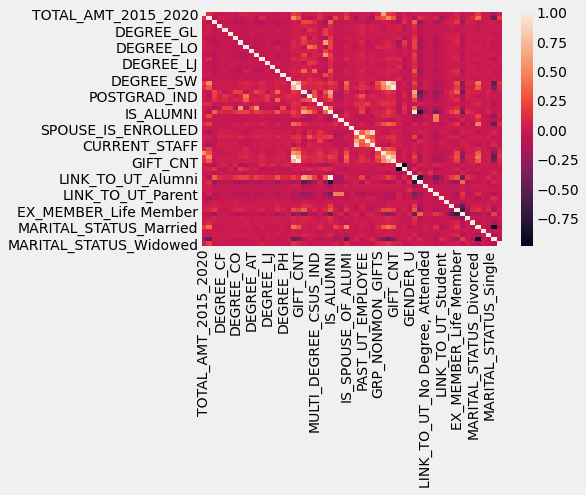

In [ ]:
sns.heatmap(new_dum_df.corr())

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#Standarize Data
scaler = StandardScaler()
scaler_new_df = scaler.fit_transform(new_dum_df)

{4: 0.27081964188989555, 5: 0.30537175041533227, 6: 0.3362558742769272, 7: 0.366236997194235, 8: 0.39004495270513545, 9: 0.4127056651892293, 10: 0.4349872273438952, 11: 0.45589079638315494, 12: 0.47715288177691945, 13: 0.49642818987977255, 14: 0.5156306839899242}


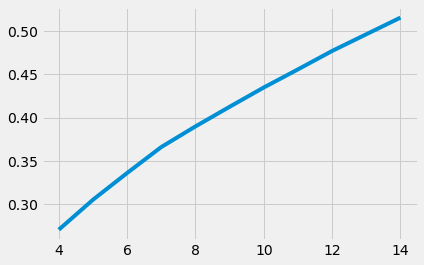

In [ ]:
from sklearn.decomposition import PCA
ratio_arr = {}
for i in range(4,15):
    pca=PCA(n_components=i)
    pca_data = pca.fit(scaler_new_df)
    ratio_arr[i]=sum(pca_data.explained_variance_ratio_)
print(ratio_arr)
pd.Series(ratio_arr).plot()

In [ ]:
pc = PCA(n_components=9).fit(scaler_new_df)
pca_reduced_final = pc.fit_transform(scaler_new_df)

final_df = pd.DataFrame(pca_reduced_final)
print(final_df.shape)
col_list = new_dum_df.columns
col_list

(91631, 9)


Index(['TOTAL_AMT_2015_2020', 'AGE', 'DEGREE_GR', 'DEGREE_CF', 'DEGREE_GL',
       'DEGREE_JS', 'DEGREE_CO', 'DEGREE_EN', 'DEGREE_LO', 'DEGREE_AT',
       'DEGREE_NS', 'DEGREE_ED', 'DEGREE_LJ', 'DEGREE_NU', 'DEGREE_LA',
       'DEGREE_PH', 'DEGREE_SW', 'TOTAL_YRS_GIVEN', 'GIFT_CNT',
       'UNDERGRAD_IND', 'POSTGRAD_IND', 'MULTI_DEGREE_CSUS_IND',
       'NUMBER_EXT_DEGREE', 'STEM_DEGREE', 'IS_ALUMNI', 'IS_PARENT_OF_ALUMNI',
       'CHILD_IS_ENROLLED', 'IS_SPOUSE_OF_ALUMI', 'SPOUSE_IS_ENROLLED',
       'CURRENT_UT_EMPLOYEE', 'PAST_UT_EMPLOYEE', 'CURRENT_FACULTY',
       'CURRENT_STAFF', 'GRP_NONMON_GIFTS', 'GRP_PROD', 'TOTAL_YRS_GIVEN',
       'GIFT_CNT', 'GENDER_F', 'GENDER_M', 'GENDER_U', 'LINK_TO_UT_Alumni',
       'LINK_TO_UT_Friend', 'LINK_TO_UT_No Degree, Attended',
       'LINK_TO_UT_Other', 'LINK_TO_UT_Parent', 'LINK_TO_UT_Student',
       'EX_MEMBER_Assoc. Life', 'EX_MEMBER_Lapsed Member',
       'EX_MEMBER_Life Member', 'EX_MEMBER_Not a Member',
       'EX_MEMBER_Short-term Me

In [ ]:
pd.DataFrame(pc.components_.T,columns=['Component_'+str(i) for i in range(9)],index=col_list)

,Component_0,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8
TOTAL_AMT_2015_2020,0.100265,0.096078,0.012262,0.084902,0.069667,-0.005290,0.033583,0.070341,0.498454
AGE,0.160247,0.241731,-0.068295,0.055264,0.000730,0.005444,0.040267,-0.087480,-0.222232
DEGREE_GR,0.066818,-0.137538,-0.098441,-0.026837,0.217832,0.061295,-0.253380,0.065452,0.201993
DEGREE_CF,0.021510,-0.032268,0.039934,-0.076317,-0.007160,0.008359,-0.020530,-0.050348,-0.023154
DEGREE_GL,0.024885,-0.032355,0.061827,-0.016450,-0.047950,-0.007611,0.203277,-0.024823,-0.108773
DEGREE_JS,0.024626,-0.026656,0.029516,0.062995,-0.070767,0.006760,0.101730,-0.060453,-0.048966
DEGREE_CO,0.034948,-0.056095,-0.014083,-0.150654,-0.013094,-0.009538,-0.103654,-0.048550,-0.132785
DEGREE_EN,0.075885,-0.102590,-0.021685,0.289915,-0.216009,-0.052904,0.110343,0.002029,-0.000492
DEGREE_LO,0.074398,-0.060997,-0.003743,-0.019250,0.371305,0.162967,0.292148,-0.057778,0.071488
DEGREE_AT,0.028131,-0.030510,0.010264,0.053192,-0.081846,-0.014537,0.120702,-0.044960,-0.106043


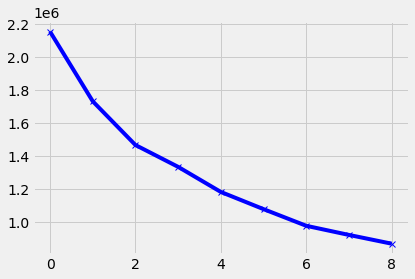

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = 10
cost = []


for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(pca_reduced_final)
    cost.append(kmeans.inertia_)
plt.plot(cost,'bx-')
plt.show()

In [ ]:
score=0
km = KMeans(5)
km.fit(pca_reduced_final)
score=silhouette_score(pca_reduced_final,km.labels_)
print(score)

0.2579105682591872


In [ ]:
col_kpi=['TOTAL_AMT_2015_2020', 'AGE', 'DEGREE_GR', 'DEGREE_CF', 'DEGREE_GL',
       'DEGREE_JS', 'DEGREE_CO', 'DEGREE_EN', 'DEGREE_LO', 'DEGREE_AT',
       'DEGREE_NS', 'DEGREE_ED', 'DEGREE_LJ', 'DEGREE_NU', 'DEGREE_LA',
       'DEGREE_PH', 'DEGREE_SW', 'TOTAL_YRS_GIVEN', 'GIFT_CNT',
       'UNDERGRAD_IND', 'POSTGRAD_IND', 'MULTI_DEGREE_CSUS_IND',
       'NUMBER_EXT_DEGREE', 'STEM_DEGREE', 'IS_ALUMNI', 'IS_PARENT_OF_ALUMNI',
       'CHILD_IS_ENROLLED', 'IS_SPOUSE_OF_ALUMI', 'SPOUSE_IS_ENROLLED',
       'CURRENT_UT_EMPLOYEE', 'PAST_UT_EMPLOYEE', 'CURRENT_FACULTY',
       'CURRENT_STAFF', 'GRP_NONMON_GIFTS', 'GRP_PROD', 'TOTAL_YRS_GIVEN',
       'GIFT_CNT', 'GENDER_F', 'GENDER_M', 'GENDER_U', 'LINK_TO_UT_Alumni',
       'LINK_TO_UT_Friend', 'LINK_TO_UT_No Degree, Attended',
       'LINK_TO_UT_Other', 'LINK_TO_UT_Parent', 'LINK_TO_UT_Student',
       'EX_MEMBER_Assoc. Life', 'EX_MEMBER_Lapsed Member',
       'EX_MEMBER_Life Member', 'EX_MEMBER_Not a Member',
       'EX_MEMBER_Short-term Member', 'MARITAL_STATUS_Divorced',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Separated',
       'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown',
       'MARITAL_STATUS_Widowed']

In [ ]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline(
    [("scaler",StandardScaler()),
    ("pca",PCA(n_components=9,random_state=42))
    ]
)

cluster = Pipeline(
    [
        ('km',KMeans(n_clusters=5,init='k-means++',n_init=50,random_state=42))
    ]
)

pipe = Pipeline(
    [
        ("preprocess",preprocess),
        ("cluster",cluster)
    ]
)




In [ ]:
pipe.fit(new_dum_df)

Pipeline(memory=None,
         steps=[('preprocess',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=9, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('cluster',
                 Pipeline(memory=None,
                          steps=[('km',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=300,
                                         n_clusters=5, n_init=50, n_jobs=None,
                                         pr

In [ ]:
preprocessed_data = pipe['preprocess'].transform(new_dum_df)
predicted_labels = pipe['cluster']['km'].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.25777858367104206

In [ ]:
cluster_df = pd.concat([new_dum_df[col_kpi],pd.Series(pipe['cluster']['km'].labels_,name="Cluster")],axis=1)
cluster_df.head()

,TOTAL_AMT_2015_2020,AGE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,TOTAL_YRS_GIVEN,TOTAL_YRS_GIVEN,GIFT_CNT,GIFT_CNT,UNDERGRAD_IND,POSTGRAD_IND,MULTI_DEGREE_CSUS_IND,NUMBER_EXT_DEGREE,STEM_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,CHILD_IS_ENROLLED,IS_SPOUSE_OF_ALUMI,SPOUSE_IS_ENROLLED,CURRENT_UT_EMPLOYEE,PAST_UT_EMPLOYEE,CURRENT_FACULTY,CURRENT_STAFF,GRP_NONMON_GIFTS,GRP_PROD,TOTAL_YRS_GIVEN,TOTAL_YRS_GIVEN,GIFT_CNT,GIFT_CNT,GENDER_F,GENDER_M,GENDER_U,LINK_TO_UT_Alumni,LINK_TO_UT_Friend,"LINK_TO_UT_No Degree, Attended",LINK_TO_UT_Other,LINK_TO_UT_Parent,LINK_TO_UT_Student,EX_MEMBER_Assoc. Life,EX_MEMBER_Lapsed Member,EX_MEMBER_Life Member,EX_MEMBER_Not a Member,EX_MEMBER_Short-term Member,MARITAL_STATUS_Divorced,MARITAL_STATUS_Married,MARITAL_STATUS_Separated,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,MARITAL_STATUS_Widowed,Cluster
0,15.00,33.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.00,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,250.00,52.057144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.00,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,819.23,35.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,820.23,4.0,4.0,5.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,485.14,52.057144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,485.14,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1050.00,69.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,21.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1956.00,9.0,9.0,21.0,21.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
five_cluster=cluster_df.groupby('Cluster').apply(lambda x: x[col_kpi].mean()).T
five_cluster

Cluster,0.0,1.0,2.0,3.0,4.0
TOTAL_AMT_2015_2020,624.726366,610.728169,627.186058,655.388574,636.829586
AGE,52.214881,52.097844,51.943588,52.650890,51.972685
DEGREE_GR,0.167976,0.167388,0.169724,0.163762,0.164785
DEGREE_CF,0.022683,0.018964,0.021324,0.021981,0.019866
DEGREE_GL,0.007858,0.008810,0.008850,0.010363,0.010024
...,...,...,...,...,...
MARITAL_STATUS_Married,0.423573,0.429894,0.427078,0.446852,0.432522
MARITAL_STATUS_Separated,0.000593,0.000199,0.000225,0.000000,0.000000
MARITAL_STATUS_Single,0.016308,0.015778,0.016492,0.016172,0.016907
MARITAL_STATUS_Unknown,0.527947,0.522921,0.526677,0.505103,0.521225
